In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [45]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

In [46]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_vegetable_recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


# Loading Model

In [47]:
cnn = tf.keras.models.load_model('/content/model/trained_model.h5')

## Visualization and Performing Prediction on Single Image

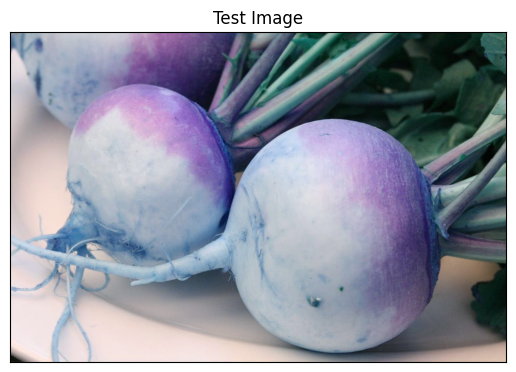

In [48]:
image_path = '/content/drive/MyDrive/Fruit_vegetable_recognition/test/turnip/Image_1.jpg'
img = cv2.imread(image_path)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [49]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # converting single image into batch
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 79ms/step


In [50]:
print(predictions[0])
print(max(predictions[0]))

[4.25641625e-18 2.56228935e-18 1.93159598e-18 1.07168095e-24
 4.58048207e-16 3.90295414e-20 6.24870393e-16 3.93355748e-09
 2.32125298e-20 5.47042338e-15 1.47686456e-26 6.12797047e-20
 1.21180572e-12 6.31988929e-20 3.08853691e-14 1.46038260e-26
 1.44506514e-19 3.64140318e-09 1.07172345e-21 1.66180851e-14
 6.85487829e-16 1.24948654e-11 1.82083612e-24 2.76896203e-19
 1.00264328e-15 2.63139594e-14 6.94787124e-21 5.97994869e-19
 2.41129534e-17 3.38195970e-13 3.77948913e-17 6.76482065e-11
 2.46420858e-15 6.72602273e-13 1.00000000e+00 4.90915626e-16]
1.0


In [51]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [53]:
file = open('labels.txt', 'w')
for i in test_set.class_names:
  file.write(i + '\n')
file.close()

In [41]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index)

(array([34]),)


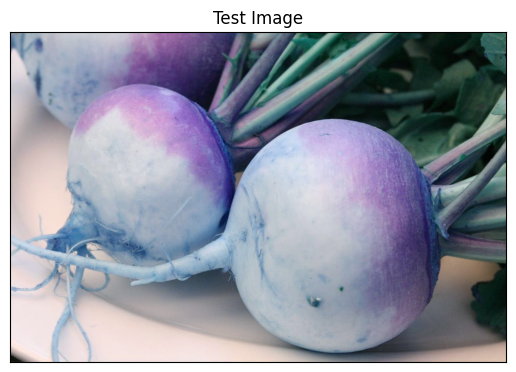

In [42]:
# Display Image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [43]:
# Single Prediction
print("It is a {}" . format(test_set.class_names[result_index[0][0]]))

It is a turnip
